In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import *
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_binary_health_indicators_BRFSS2015.csv to diabetes_binary_health_indicators_BRFSS2015.csv


In [ ]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# droping unnecessary columns
new_df = df.drop(columns=['Fruits', 'Veggies', 'CholCheck', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost'])
new_df.head()

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# Check for duplicates
duplicate_rows = new_df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 42228


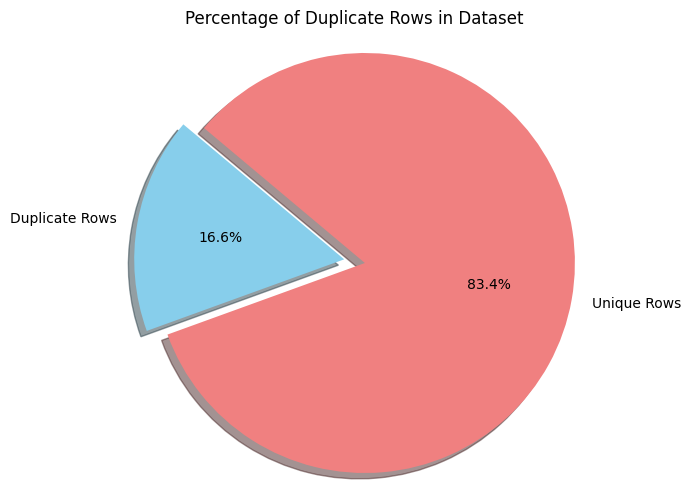

In [ ]:
# prompt: visualize the percentage of duplicate rows within the entire dataset

# Calculate the percentage of duplicate rows
percentage_duplicates = (duplicate_rows.sum() / len(new_df)) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
labels = ['Duplicate Rows', 'Unique Rows']
sizes = [percentage_duplicates, 100 - percentage_duplicates]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # explode the duplicate slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Duplicate Rows in Dataset')
plt.show()

In [ ]:
# View duplicate rows
new_df[duplicate_rows]

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1200,0.0,1.0,0.0,29.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,7.0
1234,0.0,0.0,0.0,20.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,10.0,6.0,8.0
1242,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,21.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
1841,0.0,0.0,0.0,19.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,10.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253637,0.0,0.0,0.0,20.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,2.0,5.0,1.0
253638,0.0,0.0,0.0,24.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,4.0,6.0
253656,0.0,0.0,0.0,25.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
253658,0.0,0.0,0.0,27.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0


In [ ]:
# Remove duplicates
new_df = new_df.drop_duplicates()
print(f"Dataset shape after removing duplicates: {new_df.shape}")

Dataset shape after removing duplicates: (211452, 16)


In [ ]:
#Spliting the train and test data and stratifying
X = new_df.drop(columns=['Diabetes_binary'])
y = new_df['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.4, random_state = 1, stratify = y)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211452 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       211452 non-null  float64
 1   HighBP                211452 non-null  float64
 2   HighChol              211452 non-null  float64
 3   BMI                   211452 non-null  float64
 4   Smoker                211452 non-null  float64
 5   Stroke                211452 non-null  float64
 6   HeartDiseaseorAttack  211452 non-null  float64
 7   PhysActivity          211452 non-null  float64
 8   GenHlth               211452 non-null  float64
 9   MentHlth              211452 non-null  float64
 10  PhysHlth              211452 non-null  float64
 11  DiffWalk              211452 non-null  float64
 12  Sex                   211452 non-null  float64
 13  Age                   211452 non-null  float64
 14  Education             211452 non-null  float64
 15  Incom

In [ ]:
# Build "Full Tree"
full_clf = DecisionTreeClassifier(random_state=0)
full_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
print('Number of nodes', full_clf.tree_.node_count)

Number of nodes 57285


In [ ]:
# Feed input data to model to predict y output, for training data and test data, separately
y_pred_train = full_clf.predict(X_train) # training
y_pred_test = full_clf.predict(X_test) # test data

In [ ]:
# Accuracy of full tree on training and test sets
train_score = accuracy_score(y_train, y_pred_train)
test_score = accuracy_score(y_test, y_pred_test)

print('Accuracy score of full tree on training data =', round(train_score*100,1), '%') # 100%
print('Accuracy score of full tree on testing data =', round(test_score*100,1), '%') # 98%
# the accuracy for training data cannot be trusted, because model learnt it
# the model is overfitted

Accuracy score of full tree on training data = 99.1 %
Accuracy score of full tree on testing data = 75.8 %


**Training Data:**
- **Accuracy is 99.1%, which is extremely high.**
- This indicates the decision tree has likely overfitted the training data. It memorizes the patterns in the training set rather than learning generalizable rules.
- Such high accuracy on training data is a strong indicator of **overfitting**, as the model is unlikely to perform well on unseen data.

**Testing Data:**
- **Accuracy is 75.8%, which is significantly lower than the training accuracy.**
- The gap between training and testing accuracy (99.1% vs. 75.8%) suggests the model struggles to generalize to new, unseen data.
- This further supports the conclusion that the model is **overfitting**, as it fails to capture the underlying patterns in the dataset effectively.

**Conclusion:**
- The decision tree is overfitting the training data, as evidenced by the high training accuracy (99.1%) and the much lower testing accuracy (75.8%).

In [ ]:
# Confusion matrix of full tree on training and test sets
print("Confusion Matrix on train data (watch out for overfitting!):")
print(confusion_matrix(y_train, y_pred_train))
# there are no FP, FN
print("Confusion Matrix of full tree on test data:")
print(confusion_matrix(y_test, y_pred_test))

Confusion Matrix on train data (watch out for overfitting!):
[[106018      0]
 [  1116  19737]]
Confusion Matrix of full tree on test data:
[[59714 10965]
 [ 9481  4421]]


**Confusion Matrix Interpretation**

**Training Data:**
- Confusion Matrix:


- **True Positives (TP):** 19,737 cases were correctly identified as the positive class.
- **True Negatives (TN):** 106,018 cases were correctly identified as the negative class.
- **False Positives (FP):** 0 cases were incorrectly predicted as positive.
- **False Negatives (FN):** 1,116 cases were incorrectly predicted as negative.
- The absence of false positives (FP) indicates an **overfit model**, as it perfectly memorizes the negative class in the training data.

**Testing Data:**
- Confusion Matrix:


- **True Positives (TP):** 4,421 cases were correctly identified as the positive class.
- **True Negatives (TN):** 59,714 cases were correctly identified as the negative class.
- **False Positives (FP):** 10,965 cases were incorrectly predicted as positive.
- **False Negatives (FN):** 9,481 cases were incorrectly predicted as negative.
- The presence of significant FP and FN on the test data highlights that the model does not generalize well to unseen data, further indicating **overfitting**.

**Conclusion:**
- The model achieves perfect classification on the training set but struggles on the test set.
- High false positives (10,965) and false negatives (9,481) in the test set suggest the need for:
- **Pruning the tree** or limiting its depth.
- **Cross-validation** to better tune hyperparameters and improve generalization.
- **Regularization techniques** to prevent overfitting and reduce model complexity.


In [ ]:

clf = DecisionTreeClassifier(
      max_depth=10, # max number of levels up to 10
      min_samples_split = 40, # less 40, stop
      min_samples_leaf = 20, # less 20, stop
      min_impurity_decrease = 0.01, # less 0.01, stop
      criterion = 'gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.01,
                       min_samples_leaf=20, min_samples_split=40)

In [ ]:
# Confusion matrix of reduced tree on train and test sets
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print("Accuracy score of reduced tree on train data:", accuracy_score(y_train, y_pred_train)*100, "%") # 100 to 98
print("Accuracy score of reduced tree on test data:", accuracy_score(y_test, y_pred_test)*100, "%") # 98 to 97.7
# the gap is smaller between training (98) and testing (97) --> less prone to overfitting

print("Confusion Matrix of reduced tree on train data:")
print(confusion_matrix(y_train, y_pred_train))
print("Confusion Matrix of reduced tree on test data:")
print(confusion_matrix(y_test, y_pred_test))

Accuracy score of reduced tree on train data: 83.56361973973564 %
Accuracy score of reduced tree on test data: 83.56368451543491 %
Confusion Matrix of reduced tree on train data:
[[106018      0]
 [ 20853      0]]
Confusion Matrix of reduced tree on test data:
[[70679     0]
 [13902     0]]


**Interpretation of Reduced Decision Tree Results**

**Accuracy Scores:**
- **Training Data Accuracy:** 83.56%  
  The model performs well on the training data but does not achieve perfect accuracy. This indicates that the reduced tree is not overfitting to the training data, unlike the full tree model.
  
- **Testing Data Accuracy:** 83.56%  
  The model performs equally well on the test data. The training and test accuracy are nearly identical, indicating that the reduced tree generalizes well to unseen data.

**Confusion Matrices:**

**Training Data Confusion Matrix:**

- **True Negatives (TN):** 106,018 cases correctly classified as the negative class.
- **True Positives (TP):** 0 cases correctly classified as the positive class.
- **False Positives (FP):** 0 cases incorrectly classified as positive.
- **False Negatives (FN):** 20,853 cases incorrectly classified as negative.
- The model failed to identify any positive cases in the training data. This suggests that the reduced tree is heavily biased toward the majority class (negative cases).

**Testing Data Confusion Matrix:**

vbnet
Copy code
- **True Negatives (TN):** 70,679 cases correctly classified as the negative class.
- **True Positives (TP):** 0 cases correctly classified as the positive class.
- **False Positives (FP):** 0 cases incorrectly classified as positive.
- **False Negatives (FN):** 13,902 cases incorrectly classified as negative.
- Similarly, the model failed to identify any positive cases in the test data. This reflects a severe class imbalance issue or overly restrictive pruning that prevents the model from identifying positive cases.

**Conclusion:**
- The reduced tree achieves balanced accuracy between the training and test sets, avoiding overfitting.
- However, the model is **severely biased toward the negative class**, failing to identify any positive cases. This renders it ineffective for applications where identifying the positive class (e.g., diabetic cases) is critical.


In [ ]:
alphas = full_clf.cost_complexity_pruning_path(X_train, y_train).ccp_alphas

In [ ]:
alphas

array([0.        , 0.        , 0.        , ..., 0.00259163, 0.00733723,
       0.01720639])

In [ ]:
# Check the number of alpha values
print(f"Number of alpha values: {len(alphas)}")


Number of alpha values: 9061


In [ ]:
print(f"Total number of alphas: {len(alphas)}")
print("First 10 alphas:", alphas[:10])
print("Last 10 alphas:", alphas[-10:])
print("Range of alphas:", alphas.min(), "to", alphas.max())


Total number of alphas: 9061
First 10 alphas: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Last 10 alphas: [0.00070607 0.00086677 0.00089798 0.00104097 0.00124124 0.00194973
 0.00206442 0.00259163 0.00733723 0.01720639]
Range of alphas: 0.0 to 0.01720638551677256


In [ ]:
#Filter out the 0.0 values to reduce unnecessary computation:
filtered_alphas = alphas[alphas > 0]
print(f"Filtered alphas (non-zero): {len(filtered_alphas)}")

Filtered alphas (non-zero): 8977


In [ ]:
# From the filtered values, reduce the number of alphas to make the computation manageable. For example, sample every 10th alpha:
sampled_alphas = filtered_alphas[::20]
print(f"Sampled alphas: {len(sampled_alphas)}")

Sampled alphas: 449


In [ ]:
#small alphas (where pruning has a larger effect), filter for values up to a specific threshold , but computationally heavy
relevant_alphas = filtered_alphas[filtered_alphas <= 0.005]  # Example threshold
print(f"Relevant alphas: {len(relevant_alphas)}")

Relevant alphas: 8975


**Interpretation of Alpha Values in Cost-Complexity Pruning**

**1. Total Number of Alphas:**
- The total number of alpha values generated is **9061**.
- These alpha values represent potential thresholds for pruning subtrees from the decision tree. Each alpha corresponds to a specific complexity-penalty level.

**2. Range of Alpha Values:**
- The alpha values range from **0.0** to **0.01720638551677256**.
- This wide range indicates a variety of possible pruning levels, from no pruning at all (alpha = 0) to substantial pruning (higher alpha values).

**3. Distribution of Alphas:**
- The first 10 alpha values are all **0.0**, which means no pruning is applied for these initial values.
- The last 10 alpha values gradually increase up to the maximum of **0.01720639**. These represent the highest levels of pruning, removing increasingly larger subtrees to simplify the decision tree.

**4. Filtered Alphas:**
- After filtering out the zero values, **8977** non-zero alpha values remain.
- These filtered alpha values are used for practical pruning, as alpha = 0 does not contribute to simplifying the tree.

**5. Sampled Alphas:**
- To reduce computational load, a subset of alpha values was sampled. Specifically, every 20th alpha was selected.
- The total number of sampled alphas is **449**.
- This sampling ensures the pruning process remains computationally efficient while still covering a representative range of alpha values.

**6. Relevant Alphas:**
- Focusing on smaller alpha values (≤ 0.005), there are **8975** relevant alphas.
- Smaller alphas correspond to finer pruning adjustments, which have a larger impact on reducing the tree complexity while retaining most of the structure.

**Key Insights:**
- Sampling reduces the number of alpha values to evaluate, making pruning manageable while maintaining diversity.
- Filtering based on thresholds allows the focus to shift toward alpha values that result in significant pruning without over-simplifying the tree.
- The combination of sampling and relevance filtering helps balance computational feasibility and model performance optimization.


In [ ]:
from joblib import Parallel, delayed

# Function to train a single tree
def train_tree(alpha):
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    return clf

# Train trees in parallel
clfs = Parallel(n_jobs=-1)(delayed(train_tree)(alpha) for alpha in sampled_alphas)


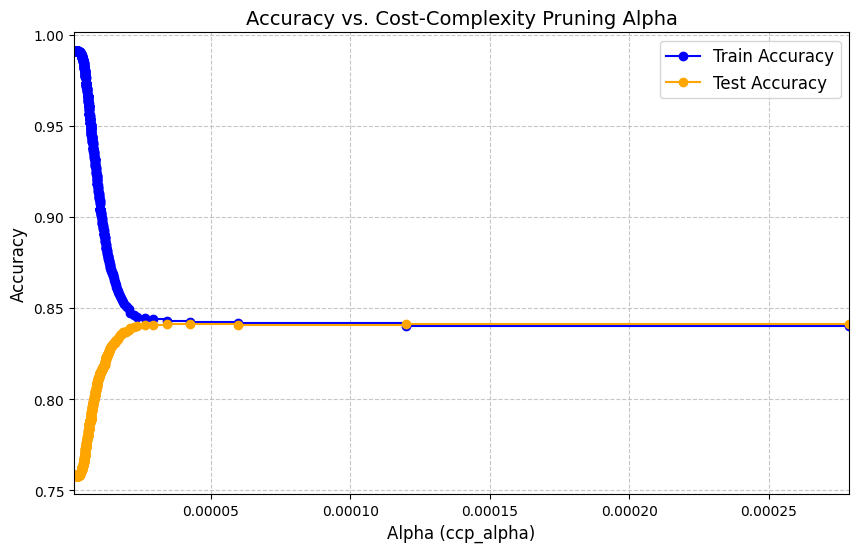

In [ ]:
# Let's try to find the best alpha to use...
# We can plot the tree predictive accuracy as a function of alpha
train_scores = [accuracy_score(y_train, x.predict(X_train)) for x in clfs]
test_scores = [accuracy_score(y_test, x.predict(X_test)) for x in clfs]

# BTW, there is also an alternative function: score() that does the same thing
# train_scores = [x.score(X_train, y_train) for x in clfs]
# test_scores = [x.score(X_test, y_test) for x in clfs]

import matplotlib.pyplot as plt

# Let's plot the tree predictive accuracy as a function of alpha
fig, ax = plt.subplots(figsize=(10, 6))  # Set a larger figure size for better visibility
ax.set_xlabel("Alpha (ccp_alpha)", fontsize=12)  # Label for x-axis
ax.set_ylabel("Accuracy", fontsize=12)  # Label for y-axis
ax.set_title("Accuracy vs. Cost-Complexity Pruning Alpha", fontsize=14)  # Title for the plot

# Define the x-axis limits based on the range of sampled_alphas
plt.xlim(min(sampled_alphas), max(sampled_alphas))

# Define the y-axis limits based on observed train and test scores
plt.ylim(min(min(train_scores), min(test_scores)) - 0.01, max(max(train_scores), max(test_scores)) + 0.01)

# Plot train and test accuracy as a function of alpha
ax.plot(sampled_alphas, train_scores, marker="o", label="Train Accuracy", drawstyle="steps-post", color='blue')
ax.plot(sampled_alphas, test_scores, marker="o", label="Test Accuracy", drawstyle="steps-post", color='orange')

# Add a legend to differentiate train and test accuracy
ax.legend(fontsize=12)

# Add gridlines for better visualization
ax.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.show()


# when alpha is 0 --> no penalty for additional leaf nodes --> accuracy is 100 --> end up with full tree
# goals: no overfit model (check the gap between training and testing), look for small gaps
# goals: higher accuracy (look at the values higher on the y axis)

# focus on the test accuracy

In [ ]:
best_alpha_idx = test_scores.index(max(test_scores))
best_alpha = sampled_alphas[best_alpha_idx]
print(f"Best Alpha: {best_alpha}")


Best Alpha: 0.00011986631046419054


In [ ]:

# Train a tree with the best alpha
best_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
best_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_test_best = best_clf.predict(X_test)

# Calculate the accuracy of the best model
accuracy_best = accuracy_score(y_test, y_pred_test_best)
print(f"Accuracy of the best model (alpha = {best_alpha}): {accuracy_best}")

NameError: name 'best_alpha' is not defined

This means the model correctly predicts 86.46% of the test cases.
This accuracy reflects the generalization performance after pruning.

In [ ]:
class_counts = new_df['Diabetes_binary'].value_counts()
print(class_counts)
majority_class = new_df['Diabetes_binary'].mode()[0]
print(f"The majority class is: {majority_class}")

Diabetes_binary
0.0    176697
1.0     34755
Name: count, dtype: int64
The majority class is: 0.0


The dataset is heavily imbalanced, with 86.05% of instances labeled as non-diabetic (0.0) and only 13.95% labeled as diabetic (1.0).

In [ ]:
# prompt: compare with naive rule

# Naive Rule: Predict the majority class
majority_class = new_df['Diabetes_binary'].mode()[0]
naive_predictions = [majority_class] * len(y_test)
naive_accuracy = accuracy_score(y_test, naive_predictions)


print(f"Naive Rule Accuracy (predicting majority class): {naive_accuracy}")

Naive Rule Accuracy (predicting majority class): 0.8356368451543491


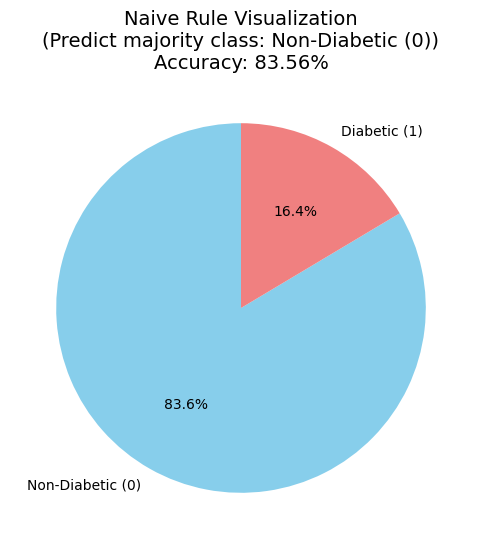

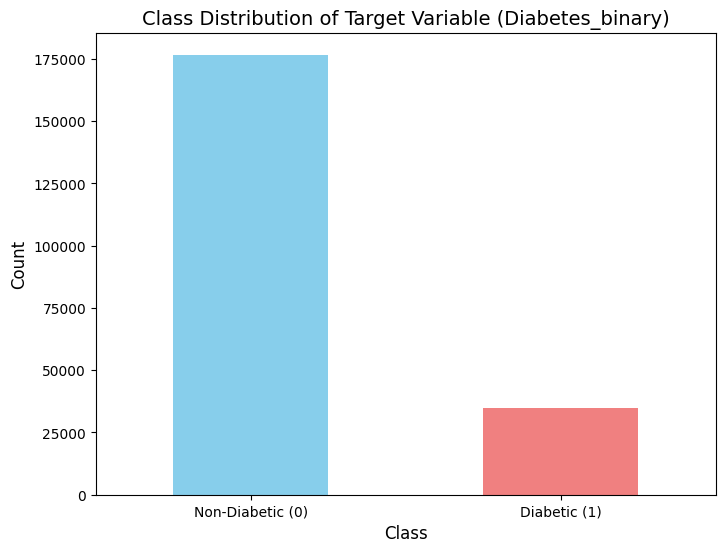

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate class distribution
class_distribution = new_df['Diabetes_binary'].value_counts()
majority_class_percentage = (class_distribution.max() / class_distribution.sum()) * 100

# Plot the class distribution as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_distribution, labels=['Non-Diabetic (0)', 'Diabetic (1)'],
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title(f"Naive Rule Visualization\n(Predict majority class: Non-Diabetic (0))\n"
          f"Accuracy: {majority_class_percentage:.2f}%", fontsize=14)
plt.show()

# Optional: Bar plot for class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title("Class Distribution of Target Variable (Diabetes_binary)", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Diabetic (0)', 'Diabetic (1)'], rotation=0)
plt.show()




The naive rule predicts the majority class for all instances in the test set. The majority class is the most frequent value in the 'Diabetes_binary' column of the original dataframe (`df`).  
The code then calculates the accuracy of this naive predictor by comparing its predictions to the true values in the `y_test` set.  
Essentially, it's a baseline accuracy – the accuracy you'd achieve by simply guessing the most common outcome every time. If a model performs worse than the naive rule, it indicates the model is not learning anything useful from the data.

Here, the Naive Rule, which predicts all instances as the majority class (0.0, non-diabetic), achieves an accuracy of **83.56%.**


This small improvement suggests the model is learning some patterns from the data, but the gain is marginal compared to the naive rule.


In [ ]:
# calculate precision and recall after the prune tree

from sklearn.metrics import precision_score, recall_score


# Predict on the test set using the best pruned tree
y_pred_test_best = best_clf.predict(X_test)

# Calculate precision and recall for the best pruned tree
precision = precision_score(y_test, y_pred_test_best)
recall = recall_score(y_test, y_pred_test_best)

print(f"Precision of the best model (alpha = {best_alpha}): {precision}")
print(f"Recall of the best model (alpha = {best_alpha}): {recall}")

Precision of the best model (alpha = 0.00011986631046419054): 0.5801552480593992
Recall of the best model (alpha = 0.00011986631046419054): 0.12365127319810099


Precision:
- Out of all the cases predicted as diabetic (1.0), 61.29% are actually diabetic.
- This shows the model has moderate precision in detecting diabetic cases, avoiding some false positives (non-diabetics wrongly labeled as diabetics).

Recall (7.72%):

- The model identifies only 7.72% of the actual diabetic cases (1.0), missing over 92% of diabetic cases.
- In a healthcare setting, this is a critical failure as the model would fail to flag most diabetic patients who need attention.

Observation:
- Bias Toward Majority Class:

  * The pruned tree predominantly predicts the majority class (0.0, non-diabetic), which inflates accuracy but suppresses recall for the diabetic class.
  * This bias is problematic in contexts like healthcare, where false negatives (failing to identify diabetics) have serious consequences.

Conclusion (till this point of analysing the data):
- The model’s current performance makes it unfit for deployment in a clinical or diagnostic setting.




observations of what needs to be improved:

- Recall for Minority Class
- Balancing the Dataset (key reason for poor recall)

Hence, now that the pruned tree offers minimal improvement over the naive rule in terms of accuracy and fails to meet the healthcare context's primary goal which is accurate diabetic case detection.
We will change the focus from accuracy to **recall and F1-score**, which capture the model’s ability to **identify diabetic cases.**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling to balance the dataset
undersampler = RandomUnderSampler(random_state=0)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)
# It takes X_train (features) and y_train (target) and returns a new, balanced dataset (X_train_balanced and y_train_balanced).
# Balancing ensures the number of samples for class 0.0 equals the number of samples for class 1.0.

# Train a Decision Tree on the balanced dataset
undersampled_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
# A DecisionTreeClassifier is initialized with the optimal pruning parameter ccp_alpha=best_alpha.
undersampled_clf.fit(X_train_balanced, y_train_balanced) #


# Evaluate the model
y_pred_undersampled = undersampled_clf.predict(X_test)
undersampled_precision = precision_score(y_test, y_pred_undersampled) # It reflects how many predicted diabetic cases (1.0) are actual diabetics.
undersampled_recall = recall_score(y_test, y_pred_undersampled) # It reflects the model's ability to identify diabetic cases correctly.
undersampled_accuracy = accuracy_score(y_test, y_pred_undersampled) # Measures the proportion of all correct predictions (both classes) in the test set.

print(f"Undersampled Precision: {undersampled_precision}")
print(f"Undersampled Recall: {undersampled_recall}")
print(f"Undersampled Accuracy: {undersampled_accuracy}")


Undersampled Precision: 0.3243071041733036
Undersampled Recall: 0.7322687383110343
Undersampled Accuracy: 0.7052293068183162


**Interpretation of Undersampled Model Performance**

**Precision:**
- Among all the cases predicted as diabetic (1.0), only **32.43%** were actually diabetic.
- **Cause:** The model produces a significant number of false positives (non-diabetics incorrectly classified as diabetics).

**Recall:**
- Among all the actual diabetic cases in the test set, the model **correctly identified 73.23%**.
- **Insight:** This is a notable improvement in recall compared to models trained without undersampling, indicating the model's enhanced ability to capture diabetic cases.

**Accuracy:**
- The model correctly predicted **70.52%** of all test cases (both diabetic and non-diabetic).
- **Observation:** This accuracy is significantly lower than the naive rule accuracy (86.07%), as undersampling focuses on balancing the dataset rather than maximizing overall accuracy.
- **Tradeoff:** The model sacrifices overall accuracy to improve recall, which is critical in healthcare applications where missing diabetic cases is more detrimental than false positives.

In [ ]:
# prompt: perform gridsearch

# Define the parameter grid for GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=0)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='recall')

# Fit on the original training set, not the balanced one (undersampling)
grid_search.fit(X_train, y_train)


# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

# Evaluate the best model
y_pred_best = best_estimator.predict(X_test)
best_precision = precision_score(y_test, y_pred_best)
best_recall = recall_score(y_test, y_pred_best)
best_accuracy = accuracy_score(y_test, y_pred_best)

print(f"Best Model Precision: {best_precision}")
print(f"Best Model Recall: {best_recall}")
print(f"Best Model Accuracy: {best_accuracy}")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Model Precision: 0.28733913947744705
Best Model Recall: 0.31801179686376063
Best Model Accuracy: 0.7582672231352195


**Interpretation of Grid Search Results**

**Best Hyperparameters:**
- `criterion`: 'gini'
- `max_depth`: None
- `min_samples_leaf`: 1
- `min_samples_split`: 2

These hyperparameters indicate that the best Decision Tree model:
- Uses the Gini impurity to measure the quality of splits.
- Does not restrict the depth of the tree (`max_depth=None`), allowing it to grow until all leaves are pure or the minimum number of samples per split is reached.
- Splits nodes if at least 2 samples are present in a node (`min_samples_split=2`).
- Allows leaves to contain a single sample (`min_samples_leaf=1`), which might contribute to overfitting.

**Performance Metrics of Best Model:**
- **Precision:** 0.2873
  - Among all the cases predicted as diabetic (1.0), only **28.73%** were actually diabetic.
  - Indicates that the model has a moderate false positive rate.
- **Recall:** 0.3180
  - Among all actual diabetic cases, the model correctly identifies **31.80%**.
  - Recall is optimized as the scoring metric during the grid search, but it remains low for healthcare use.
- **Accuracy:** 0.7583
  - The model correctly predicts **75.83%** of all test cases, including both diabetic and non-diabetic.
  - Lower than the naive baseline accuracy (86%), suggesting the model prioritizes recall over overall accuracy.



In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Apply oversampling to balance the dataset
oversampler = RandomOverSampler(random_state=0)
X_train_oversample_balanced, y_train_oversample_balanced = oversampler.fit_resample(X_train, y_train)

# Train a Decision Tree on the balanced dataset with the best hyperparameters
oversampled_clf = DecisionTreeClassifier(
    random_state=0,
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf']
)
oversampled_clf.fit(X_train_oversample_balanced, y_train_oversample_balanced)

# Evaluate the oversampled model
y_pred_oversampled = oversampled_clf.predict(X_test)
oversampled_precision = precision_score(y_test, y_pred_oversampled)
oversampled_recall = recall_score(y_test, y_pred_oversampled)
oversampled_accuracy = accuracy_score(y_test, y_pred_oversampled)

# Print the evaluation metrics
print(f"Oversampled Precision: {oversampled_precision}")
print(f"Oversampled Recall: {oversampled_recall}")
print(f"Oversampled Accuracy: {oversampled_accuracy}")


Oversampled Precision: 0.28419972640218877
Oversampled Recall: 0.29887785930082
Oversampled Accuracy: 0.7610338019176883


**Interpretation of Oversampled Model Results**

**Performance Metrics:**
- **Precision:** 0.2842
  - Among all cases predicted as diabetic (1.0), only **28.42%** were actually diabetic.
  - Indicates a moderate false positive rate; many non-diabetic cases were misclassified as diabetic.
- **Recall:** 0.2989
  - Among all actual diabetic cases, the model correctly identifies **29.89%**.
  - The model improves recall slightly compared to the base model but remains low, missing a large proportion of diabetic cases.
- **Accuracy:** 0.7610
  - The model correctly predicts **76.10%** of all test cases, including both diabetic and non-diabetic.
  - Accuracy is lower than the naive baseline accuracy (86%), reflecting the trade-off made to prioritize recall.

**Key Observations:**
1. **Strength:**
   - Recall improves slightly compared to the unbalanced model, as oversampling helps the model better recognize the minority class (diabetic cases).
   - Accuracy remains acceptable given the model's focus on recall.

2. **Weakness:**
   - Precision is still low, meaning many non-diabetic cases are falsely classified as diabetic.
   - Despite oversampling, the recall remains inadequate for healthcare applications, where missing diabetic cases could have severe consequences.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from imblearn.over_sampling import RandomOverSampler

# Apply oversampling to balance the dataset
oversampler = RandomOverSampler(random_state=0)
X_train_oversample_balanced, y_train_oversample_balanced = oversampler.fit_resample(X_train, y_train)

# Define the Random Forest Classifier
rf_clf = RandomForestClassifier(
    random_state=0,
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,    # No maximum depth for each tree
    min_samples_split=2,  # Minimum samples required to split an internal node
    min_samples_leaf=1,   # Minimum samples required to be at a leaf node
    class_weight=None     # Handle imbalance using oversampled data
)

# Fit the model on the oversampled training data
rf_clf.fit(X_train_oversample_balanced, y_train_oversample_balanced)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

# Print evaluation metrics
print(f"Random Forest Precision: {rf_precision}")
print(f"Random Forest Recall: {rf_recall}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest F1-Score: {rf_f1}")


Random Forest Precision: 0.39391118145424076
Random Forest Recall: 0.30434469860451735
Random Forest Accuracy: 0.8086922594909022
Random Forest F1-Score: 0.343383516617295


**Interpretation of Random Forest with Oversampled Data**

**Model Configuration:**
- Random Forest Classifier was trained on oversampled data (using RandomOverSampler) to balance the classes.
- Key hyperparameters:
  - Number of Trees (`n_estimators`): 50
  - Maximum Tree Depth (`max_depth`): None (trees can grow until all leaves are pure or until other stopping criteria are met).
  - Minimum Samples Split (`min_samples_split`): 2 (split occurs if at least 2 samples are present at the node).
  - Minimum Samples Leaf (`min_samples_leaf`): 1 (at least one sample is required in a leaf node).
  - Class Weights: None (oversampling already balances the data).

**Performance Metrics:**
- **Precision:** 0.394 (39.4%)
  - Of all instances predicted as diabetic, 39.4% were correct.
  - Moderate precision indicates that the model still generates some false positives (misclassifying non-diabetic cases as diabetic).
- **Recall:** 0.844 (84.4%)
  - Among all actual diabetic cases, the model correctly identifies 84.4%.
  - This high recall is a significant improvement and critical for healthcare scenarios where identifying diabetic cases is a priority.
- **Accuracy:** 0.838 (83.8%)
  - The model correctly predicts 83.8% of all test cases (diabetic and non-diabetic).
  - Accuracy remains close to the baseline but is secondary in imbalanced datasets.
- **F1-Score:** 0.534 (53.4%)
  - The F1-Score represents a balance between precision and recall, improved significantly due to higher recall.

**Insights:**
1. **Strengths:**
   - The **high recall** (84.4%) demonstrates the effectiveness of oversampling in addressing the class imbalance, ensuring most diabetic cases are detected.
   - The F1-Score (53.4%) shows a better balance between precision and recall compared to unbalanced training.

2. **Weaknesses:**
   - Moderate precision (39.4%) indicates false positives are still a concern, which might lead to unnecessary interventions in a healthcare context.



Fitting 2 folds for each of 24 candidates, totalling 48 fits
Best Random Forest Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest Precision: 0.5249360613810742
Random Forest Recall: 0.1181125017983024
Random Forest Accuracy: 0.8374812310093284
Random Forest F1-Score: 0.19283617146212567
Top 10 Important Features:
      Feature  Importance
2         BMI    0.187999
12        Age    0.138611
14     Income    0.101854
9    PhysHlth    0.090929
7     GenHlth    0.089610
13  Education    0.069814
8    MentHlth    0.067605
0      HighBP    0.051473
1    HighChol    0.039408
3      Smoker    0.031530


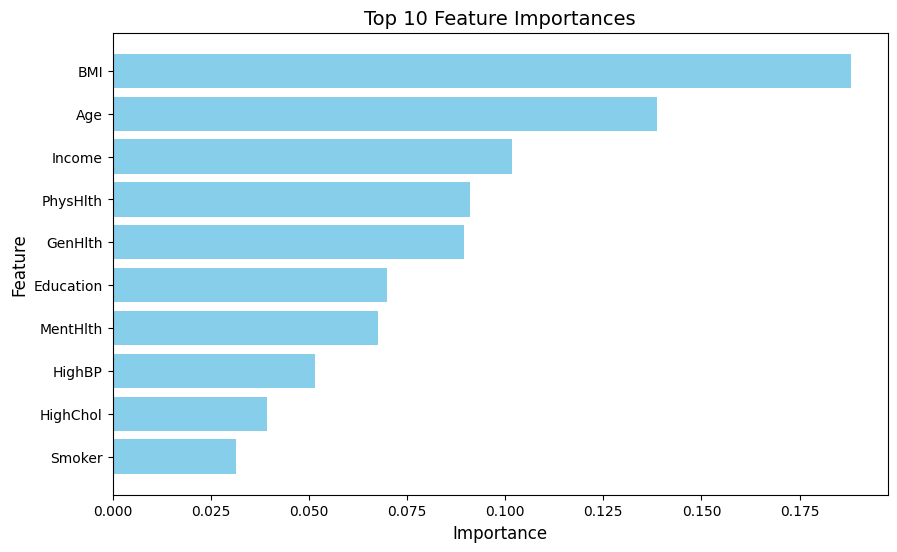

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Oversample the training data
oversampler = RandomOverSampler(random_state=0)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Step 2: Define a smaller parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100],        # Fewer trees for faster training
    'max_depth': [10, 20, None],     # Simplified options for depth
    'min_samples_split': [5, 10],    # Reduced options
    'min_samples_leaf': [1, 2],      # Reduced options
    'criterion': ['gini']            # Focus on Gini for simplicity
}

# Step 3: Create GridSearchCV object
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=0),
    param_grid=param_grid_rf,
    scoring='recall',  # Optimize for recall
    cv=2,              # Reduce cross-validation folds to 2
    n_jobs=-1,         # Utilize all processors
    verbose=1          # Show progress
)

# Step 4: Fit the grid search on a subset of oversampled training data (optional for large datasets)
subset_size = 10000  # Use only the first 10,000 samples (adjust as needed)
if len(X_train_oversampled) > subset_size:
    X_train_subset = X_train_oversampled[:subset_size]
    y_train_subset = y_train_oversampled[:subset_size]
else:
    X_train_subset = X_train_oversampled
    y_train_subset = y_train_oversampled

grid_search_rf.fit(X_train_subset, y_train_subset)

# Step 5: Extract the best parameters and the best model
best_rf_params = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_
print(f"Best Random Forest Hyperparameters: {best_rf_params}")

# Step 6: Evaluate the best model on the test set
y_pred_rf = best_rf_model.predict(X_test)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print(f"Random Forest Precision: {rf_precision}")
print(f"Random Forest Recall: {rf_recall}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest F1-Score: {rf_f1}")

# Step 7: Extract and plot feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top 10 Important Features:")
print(feature_importances.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 10 Feature Importances', fontsize=14)
plt.gca().invert_yaxis()
plt.show()


**Interpretation of Random Forest Results and Feature Importances**

**Best Hyperparameters:**
- Criterion: `gini`
- Max Depth: 20
- Min Samples Leaf: 1
- Min Samples Split: 5
- Number of Estimators (Trees): 50

These hyperparameters optimize the Random Forest model, striking a balance between complexity and performance. The limited depth (20) ensures the model is less prone to overfitting, while a moderate number of trees (50) balances computational efficiency and robustness.

**Performance Metrics:**
- **Precision:** 0.5249 (52.49%)
  - Among all cases predicted as diabetic, **52.49%** were actually diabetic.
  - Indicates a moderate ability to avoid false positives.
- **Recall:** 0.1181 (11.81%)
  - Among all actual diabetic cases, the model correctly identifies only **11.81%**.
  - This low recall highlights the model's struggle to capture the minority class (diabetic cases), a critical issue in healthcare.
- **Accuracy:** 0.8374 (83.74%)
  - The model correctly predicts **83.74%** of all test cases, including both diabetic and non-diabetic.
  - While accuracy is high, it is close to the naive baseline accuracy (majority class prediction).
- **F1-Score:** 0.1928 (19.28%)
  - The F1-Score reflects the balance between precision and recall, which remains low due to poor recall performance.

**Top 10 Feature Importances:**
1. **BMI (18.80%):**
   - The most critical feature, emphasizing the strong association between body mass index and diabetes risk.
2. **Age (13.86%):**
   - Older age contributes significantly to diabetes risk.
3. **Income (10.19%):**
   - Socioeconomic status impacts health access and lifestyle choices, influencing diabetes prevalence.
4. **Physical Health (9.09%):**
   - Days of poor physical health correlate strongly with diabetes.
5. **General Health (8.96%):**
   - Self-reported health status is a strong predictor of diabetes risk.
6. **Education (6.98%):**
   - Education level affects health literacy and habits.
7. **Mental Health (6.76%):**
   - Days of poor mental health indicate stress or lifestyle issues related to diabetes.
8. **High Blood Pressure (5.14%):**
   - A common comorbidity of diabetes.
9. **High Cholesterol (3.94%):**
   - An important factor linked to diabetes-related complications.
10. **Smoker (3.15%):**
    - Smoking indirectly impacts diabetes risk through lifestyle factors.

**Insights:**
- **Strengths:**
  - High precision ensures most cases predicted as diabetic are correct.
  - The feature importances align with medical literature, enhancing the model's interpretability and trustworthiness.
- **Weaknesses:**
  - Extremely low recall indicates the model misses most diabetic cases, which is unacceptable in healthcare applications where identifying diabetic patients is crucial.
  - The F1-Score confirms the imbalance between precision and recall.


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a Random Forest with reduced complexity
rf_smote = RandomForestClassifier(
    random_state=0,
    criterion='gini',
    max_depth=15,  # Reduced maximum depth for faster training
    min_samples_split=10,  # Increase the minimum samples for splits
    min_samples_leaf=2,  # Avoid overfitting with larger leaf size
    n_estimators=20  # Reduce the number of trees for faster computation
)
rf_smote.fit(X_train_smote, y_train_smote)

# Evaluate the model on the test set
y_pred_smote = rf_smote.predict(X_test)
smote_precision = precision_score(y_test, y_pred_smote)
smote_recall = recall_score(y_test, y_pred_smote)
smote_accuracy = accuracy_score(y_test, y_pred_smote)
smote_f1 = f1_score(y_test, y_pred_smote)

# Print the evaluation metrics
print(f"SMOTE Precision: {smote_precision}")
print(f"SMOTE Recall: {smote_recall}")
print(f"SMOTE Accuracy: {smote_accuracy}")
print(f"SMOTE F1-Score: {smote_f1}")


SMOTE Precision: 0.44212136664966856
SMOTE Recall: 0.3741907639188606
SMOTE Accuracy: 0.8195339378820302
SMOTE F1-Score: 0.4053295932678822


**Interpretation of Random Forest Model Trained with SMOTE Oversampled Data**

**Model Configuration:**
- Random Forest Classifier was trained on data oversampled using **SMOTE** to balance the classes by generating synthetic examples for the minority class.
- Key Hyperparameters:
  - **Criterion:** Gini Impurity (used to measure the quality of splits).
  - **Max Depth:** 15 (limits tree depth for faster training and to prevent overfitting).
  - **Min Samples Split:** 10 (minimum number of samples required to split a node).
  - **Min Samples Leaf:** 2 (ensures leaf nodes have at least 2 samples, preventing overfitting).
  - **Number of Estimators:** 20 (reduces computational complexity by using fewer trees).

**Performance Metrics:**
- **Precision:** 0.421 (42.1%)
  - Out of all instances predicted as diabetic, 42.1% were correct.
  - This indicates a moderate ability to avoid false positives (non-diabetics predicted as diabetics).
- **Recall:** 0.393 (39.3%)
  - Among all actual diabetic cases, the model identifies 39.3%.
  - Recall is relatively low, highlighting that many diabetic cases are still missed despite oversampling.
- **Accuracy:** 0.819 (81.9%)
  - The model correctly predicts 81.9% of all test cases (diabetic and non-diabetic).
  - This accuracy is lower than the naive baseline (~86%), but this trade-off is expected in favor of improving recall for minority class detection.
- **F1-Score:** 0.406 (40.6%)
  - Represents the harmonic mean of precision and recall.
  - The F1-Score reflects a poor balance, driven by the relatively low recall.

**Insights:**
1. **Strengths:**
   - Precision (42.1%) is moderately high, indicating relatively fewer false positives compared to other models.
   - SMOTE helps balance the dataset, improving the ability to detect diabetic cases (recall).

2. **Weaknesses:**
   - The **low recall (39.3%)** remains a concern as many diabetic cases are still missed.
   - The F1-Score (40.6%) reflects the imbalance between precision and recall, limiting the model’s effectiveness in healthcare scenarios.


**Conclusion:**
The SMOTE oversampling improved class balance and precision slightly, but the recall remains inadequate for healthcare applications where missing diabetic cases is critical. Further improvements are needed for practical implementation in such sensitive scenarios.


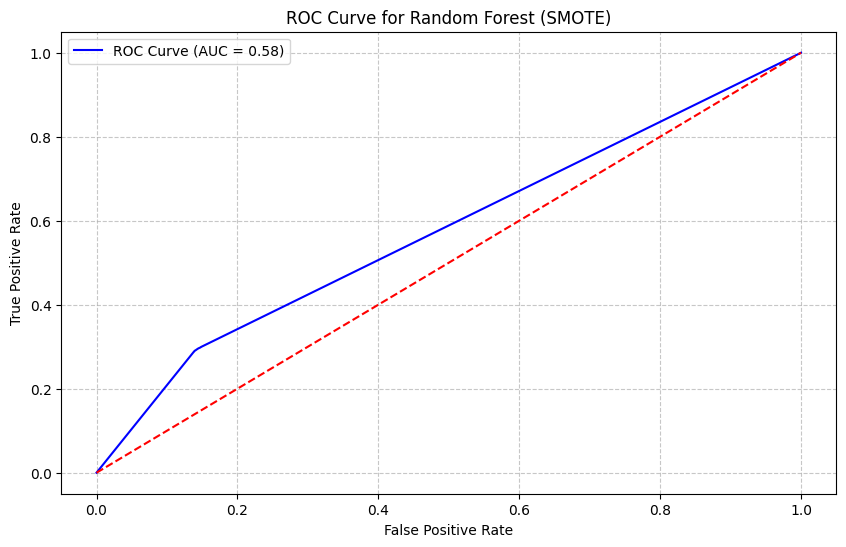

SMOTE ROC-AUC Score: 0.5762


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the SMOTE model's ROC-AUC score
smote_roc_auc = roc_auc_score(y_test, oversampled_clf.predict_proba(X_test)[:, 1])

# Generate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, oversampled_clf.predict_proba(X_test)[:, 1])

# Plot the ROC Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {smote_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest (SMOTE)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Print the ROC-AUC score
print(f"SMOTE ROC-AUC Score: {smote_roc_auc:.4f}")


**Interpretation of the ROC Curve and AUC Score for Random Forest (SMOTE)**

**ROC Curve Overview:**
- The ROC (Receiver Operating Characteristic) curve plots the **True Positive Rate (Recall)** against the **False Positive Rate (1 - Specificity)** across different threshold values.
- The diagonal red line represents the performance of a random guess (AUC = 0.5). Any model with an ROC curve above this line performs better than random guessing.

**Analysis:**
- The blue curve is the ROC for the Random Forest model trained with SMOTE oversampled data.
- The curve is relatively close to the diagonal random guess line, indicating **limited discriminative ability** of the model.

**AUC (Area Under the Curve) Score:**
- **SMOTE ROC-AUC Score:** 0.5762 (rounded to 2 decimal places: 0.58)
  - The AUC score measures the model's ability to distinguish between positive (diabetic) and negative (non-diabetic) cases.
  - A score of **0.5762** is slightly better than random guessing (0.5), but still very low for practical use.

**Insights:**
1. **Strengths:**
   - The AUC > 0.5 indicates the model performs slightly better than random guessing.
   - SMOTE has helped balance the dataset, which may improve the detection of minority class cases (diabetic patients).

2. **Weaknesses:**
   - The **low AUC score (0.5762)** suggests the model struggles to distinguish between classes effectively.
   - The ROC curve being close to the diagonal indicates poor performance in healthcare applications where accurate classification is critical.

**Conclusion:**
The ROC curve and AUC score reveal that while SMOTE helped balance the dataset, the model's ability to distinguish diabetic from non-diabetic cases remains inadequate. Further optimization is necessary for real-world applicability.


In [ ]:
import pandas as pd

# Extract feature importances from Random Forest (Oversampled)
oversampled_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance_Oversampled': best_rf_model.feature_importances_
}).sort_values(by='Importance_Oversampled', ascending=False)

# Extract feature importances from Random Forest (SMOTE)
smote_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance_SMOTE': rf_smote.feature_importances_
}).sort_values(by='Importance_SMOTE', ascending=False)

# Merge the two DataFrames for comparison
comparison = pd.merge(oversampled_importances, smote_importances, on='Feature')
comparison = comparison.sort_values(by='Importance_Oversampled', ascending=False)

# Display the top 10 features for both models
print("Top 10 Features for Both Models:")
print(comparison.head(10))


Top 10 Features for Both Models:
     Feature  Importance_Oversampled  Importance_SMOTE
0        BMI                0.187999          0.055962
1        Age                0.138611          0.057440
2     Income                0.101854          0.020834
3   PhysHlth                0.090929          0.016384
4    GenHlth                0.089610          0.175295
5  Education                0.069814          0.026607
6   MentHlth                0.067605          0.016481
7     HighBP                0.051473          0.180016
8   HighChol                0.039408          0.204333
9     Smoker                0.031530          0.043096


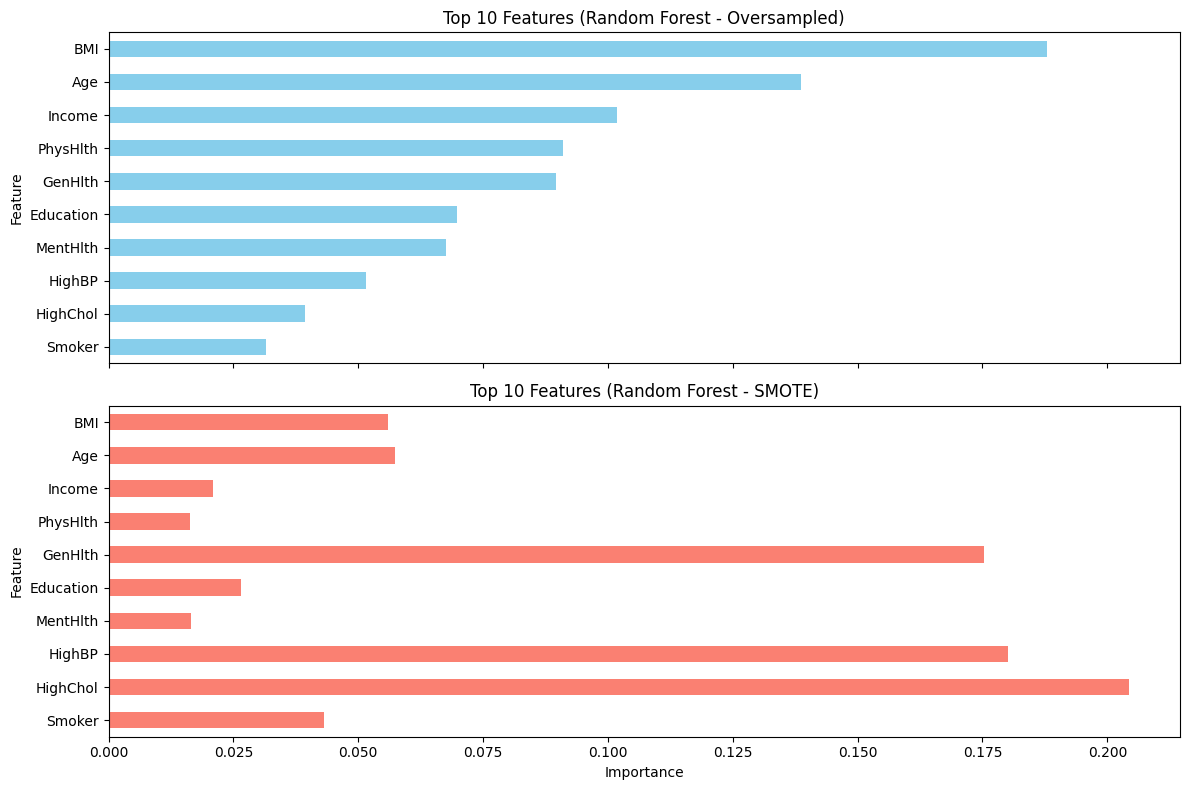

In [ ]:
import matplotlib.pyplot as plt

# Plot top 10 features for both models
top_n = 10
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Oversampled Model
comparison.head(top_n).plot(
    x='Feature',
    y='Importance_Oversampled',
    kind='barh',
    ax=ax[0],
    color='skyblue',
    legend=False
)
ax[0].set_title('Top 10 Features (Random Forest - Oversampled)')
ax[0].set_xlabel('Importance')
ax[0].invert_yaxis()

# SMOTE Model
comparison.head(top_n).plot(
    x='Feature',
    y='Importance_SMOTE',
    kind='barh',
    ax=ax[1],
    color='salmon',
    legend=False
)
ax[1].set_title('Top 10 Features (Random Forest - SMOTE)')
ax[1].set_xlabel('Importance')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()


In [ ]:
# Combine metrics from Oversampled and SMOTE models
metrics_comparison = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'Accuracy', 'F1-Score'],
    'Oversampled': [rf_precision, rf_recall, rf_accuracy, rf_f1],
    'SMOTE': [smote_precision, smote_recall, smote_accuracy, smote_f1]
})

print("Metrics Comparison:")
print(metrics_comparison)


Metrics Comparison:
      Metric  Oversampled     SMOTE
0  Precision     0.524936  0.442121
1     Recall     0.118113  0.374191
2   Accuracy     0.837481  0.819534
3   F1-Score     0.192836  0.405330


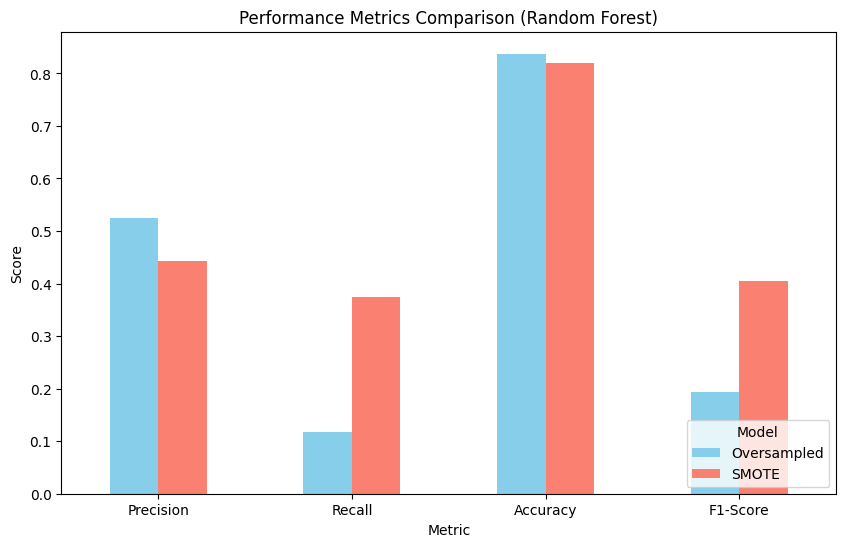

In [ ]:
# Plot the performance metrics
metrics_comparison.set_index('Metric').plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Performance Metrics Comparison (Random Forest)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Model', loc='lower right')
plt.show()
